In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from clustering_and_prim_tools import *

In [49]:
mydata = pd.read_csv(r'EAD.csv',header=[0,1],index_col=[0]).dropna()

In [51]:
mydata.sample(4)

desc                                                  \
        full_name wbinc           GDP        length   infra_value   
PRK   North Korea   LIC  2.850000e+10  7.464265e+04  1.922487e+11   
TZA      Tanzania   LIC  5.209032e+10  3.295967e+05  3.453670e+11   
BFA  Burkina Faso   LIC  1.287311e+10  7.111301e+04  4.946984e+10   
JPN         Japan   HIC  6.200000e+12  1.537508e+06  2.783207e+12   

               MH                                                          \
           perc_0       perc_20       perc_40       perc_50       perc_60   
PRK  1.591229e+07  2.084872e+07  2.576418e+07  2.760812e+07  3.266984e+07   
TZA  1.493541e+07  1.983123e+07  2.459804e+07  2.708302e+07  3.244566e+07   
BFA  2.732549e+06  3.910015e+06  4.911905e+06  5.438495e+06  6.653447e+06   
JPN  4.223440e+08  7.702203e+08  1.257610e+09  1.534868e+09  1.827152e+09   

         ...                 CF                                       Cyc  \
         ...            perc_60       perc_80      perc_100        perc_0   
PRK      ...       6.250380e+06  1.003088e+07  1.747858e+07  8.475603e+04   
TZA      ...       1.553385e+05  2.330276e+05  4.007274e+05  1.373324e+02   
BFA      ...       0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
JPN      ...       1.022504e+08  1.592719e+08  2.860632e+08  2.749891e+06   

                                                                           \
          perc_20       perc_40       perc_50       perc_60       perc_80   
PRK  2.881824e+05  3.577640e+05  5.886364e+05  6.261911e+05  9.171060e+05   
TZA  4.508851e+02  5.493296e+02  9.178060e+02  9.613267e+02  1.373324e+03   
BFA  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
JPN  1.459933e+07  2.297610e+07  3.684671e+07  4.907578e+07  1.017604e+08   

                   
         perc_100  
PRK  1.097425e+06  
TZA  1.373324e+03  
BFA  0.000000e+00  
JPN  2.290741e+08  

[4 rows x 47 columns]

In [52]:
mydata.columns

MultiIndex(levels=[['CF', 'Cyc', 'EQ', 'FU', 'MH', 'PU', 'desc'], ['GDP', 'full_name', 'infra_value', 'length', 'perc_0', 'perc_100', 'perc_20', 'perc_40', 'perc_50', 'perc_60', 'perc_80', 'wbinc']],
           labels=[[6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], [1, 11, 0, 3, 2, 4, 6, 7, 8, 9, 10, 5, 4, 6, 7, 8, 9, 10, 5, 4, 6, 7, 8, 9, 10, 5, 4, 6, 7, 8, 9, 10, 5, 4, 6, 7, 8, 9, 10, 5, 4, 6, 7, 8, 9, 10, 5]])

In [67]:
basic_data = mydata['desc'].copy()

In [68]:
basic_data = basic_data[basic_data.GDP>0].copy()

In [69]:
hazard_data = mydata[['CF', 'Cyc', 'EQ', 'FU', 'MH', 'PU']]

In [70]:
total_EAD = hazard_data.stack(0)['perc_50'].sum(level=0).copy()

In [71]:
basic_data.loc[:,'total_EAD'] = total_EAD

In [72]:
basic_data['EAD_per_infra'] = basic_data.total_EAD/basic_data.infra_value
basic_data['EAD_per_GDP'] = basic_data.total_EAD/basic_data.GDP
basic_data['EAD_per_km'] = basic_data.total_EAD/basic_data.length

In [73]:
basic_data.sample(3)

,full_name,wbinc,GDP,length,infra_value,total_EAD,EAD_per_infra,EAD_per_GDP,EAD_per_km
GRD,Grenada,UMC,1.118817e+09,1121.994227,6.411195e+08,4.097247e+05,0.000639,0.000366,365.175423
SYC,Seychelles,HIC,1.485994e+09,780.102552,7.628905e+08,0.000000e+00,0.000000,0.000000,0.000000
VUT,Vanuatu,LMC,8.628798e+08,3302.289805,9.904746e+08,4.365317e+06,0.004407,0.005059,1321.906205


In [74]:
basic_data[['EAD_per_infra','EAD_per_GDP','EAD_per_km','total_EAD']].describe()

,EAD_per_infra,EAD_per_GDP,EAD_per_km,total_EAD
count,225.000000,225.000000,225.000000,2.250000e+02
mean,0.000702,0.001055,527.618550,1.165609e+08
std,0.001397,0.001544,681.599739,4.877321e+08
min,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000040,0.000074,98.998572,1.345419e+06
50%,0.000211,0.000383,320.219240,1.518831e+07
75%,0.000759,0.001335,673.147133,5.676263e+07
max,0.012983,0.008454,4300.238397,6.187677e+09


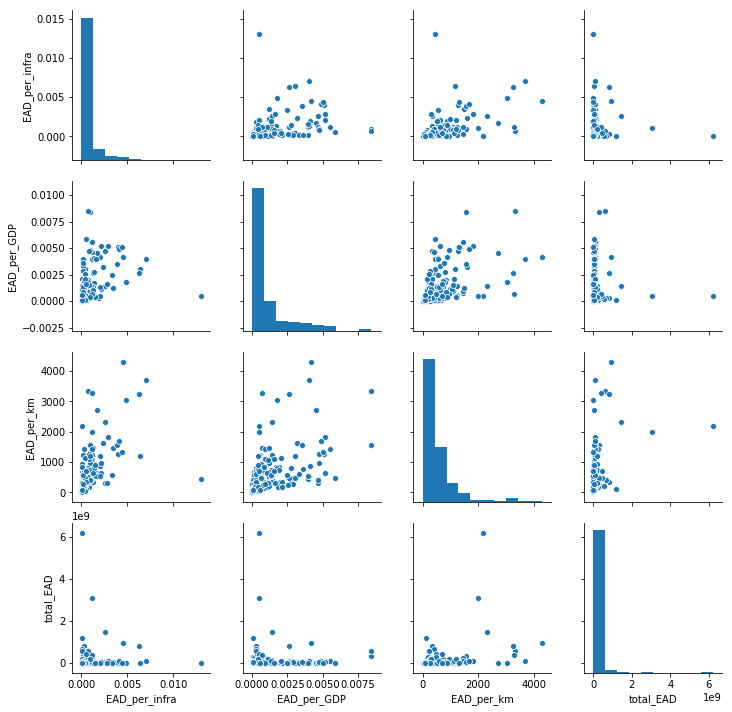

In [75]:
sns.pairplot(basic_data[['EAD_per_infra','EAD_per_GDP','EAD_per_km','total_EAD']])

In [79]:
oois = ['EAD_per_infra','EAD_per_GDP','EAD_per_km','total_EAD']

outcomes = basic_data[['EAD_per_infra','EAD_per_GDP','EAD_per_km','total_EAD']].copy()

data = np.array([[outcomes[oois[0]][i],outcomes[oois[1]][i],outcomes[oois[2]][i],outcomes[oois[3]][i]] for i in range(len(outcomes))])
data = normalize(data)

In [82]:
from sklearn import mixture

aic = []
bic = []
max_components = 10
x = [x for x in range(1,max_components)]

for nc in x:
    g = mixture.GaussianMixture(n_components=int(nc))
    g.fit(data)
    if g.converged_:
        aic.append(g.aic(data))
        bic.append(g.bic(data))
    else:
        aic.append(None)
        bic.append(None)

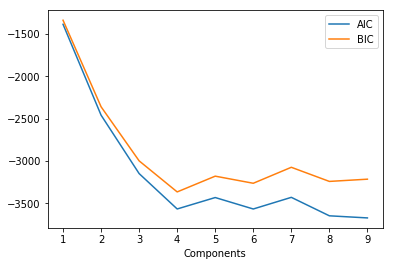

In [83]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, aic, label='AIC')
ax.plot(x, bic, label='BIC')
ax.legend(loc='best')
ax.set_xlabel('Components')

plt.show()

In [93]:
n_clusters = 9

g = mixture.GaussianMixture(n_components=n_clusters)
g.fit(data)
pred = g.predict(data)

In [87]:
import matplotlib.ticker as ticker

def make_parallel_plot(data, labels):

    fig = plt.figure()
    axes = []
    
    for i in range(1, data.shape[1]):
        ax = fig.add_subplot(1,data.shape[1]-1,i,  ylim=(-0.1,1.1))
        axes.append(ax)
        ax.set_xlim([i,i+1])
        ax.xaxis.set_major_locator(ticker.FixedLocator([i]))
        ax.xaxis.set_ticklabels([labels[i-1]])
        ax.xaxis.set_tick_params(bottom=False, top=False)
        
        ax.yaxis.set_ticks([])
        ax.text(i, 1.01, "1", va="bottom", ha="center")
        ax.text(i, -0.01, "0", va="top", ha="center")
        
        ax.spines['left'].set_bounds(0, 1)
        ax.spines['right'].set_bounds(0, 1)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)

    ax.spines['right'].set_bounds(0, 1)
    ax.xaxis.set_major_locator(ticker.FixedLocator([i, i+1]))
    ax.xaxis.set_ticklabels(labels[i-1:i+1])
    ax.text(i+1, 1.01, "1", va="bottom", ha="center")
    ax.text(i+1, -0.01, "0", va="top", ha="center")
    
    for tick in ax.yaxis.get_major_ticks():
        tick.label2On=True
    
    plt.subplots_adjust(wspace=0)
    
    return fig, axes


def plot_data_parallel(data, labels, classes):
    C = set(classes)
    C = list(C)
    C.sort()
    
    norm_data = normalize(data)
    figures = []
    for index, Ci in enumerate(C):
        fig, axes = make_parallel_plot(data, labels)
        fig.suptitle('class {}'.format(Ci), fontsize=20)
        figures.append(fig)
        logical = classes==Ci
        
        for i,j in zip(range(data.shape[1]-1),range(1,data.shape[1])):
            ax = axes[i]
            y = norm_data[logical==False, i:j+1]
            x = np.tile([i+1,j+1], (data.shape[0], 1))
            ax.plot(x.T, y.T, c='#C0C0C0')
            
            y = norm_data[logical, i:j+1]
            x = np.tile([i+1,j+1], (data.shape[0], 1))
            ax.plot(x.T, y.T, c='b')
            
    return figures

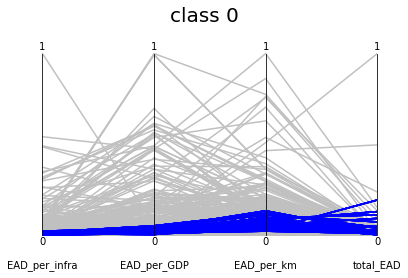

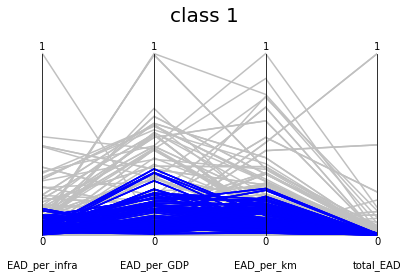

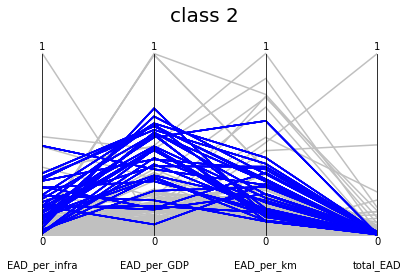

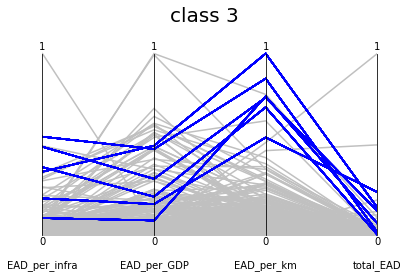

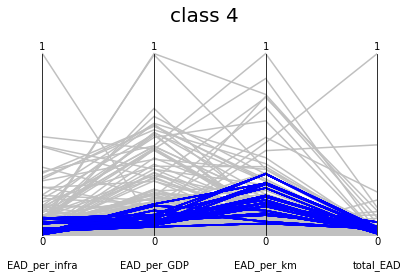

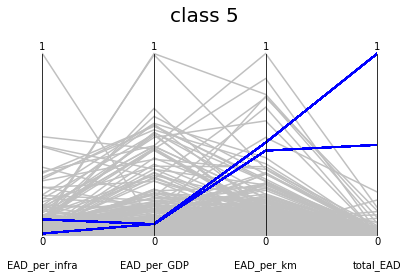

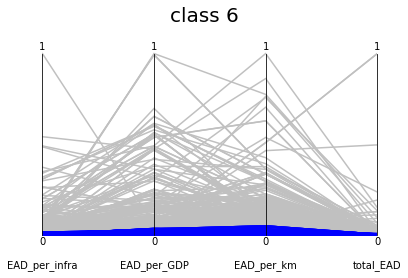

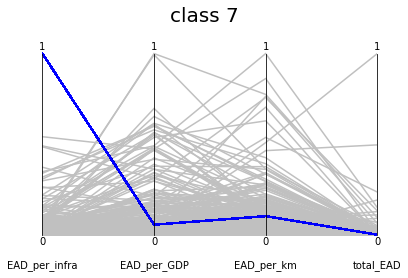

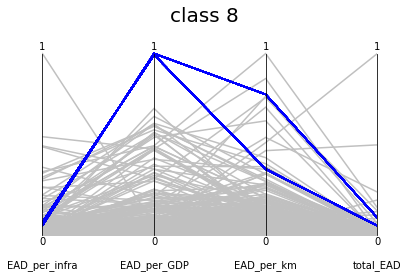

In [94]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

labels = ['EAD_per_infra','EAD_per_GDP','EAD_per_km','total_EAD']

plot_data_parallel(data, labels, pred)
plt.show()